In [6]:
import pandas as pd
import numpy as np
store_sales = pd.read_csv("data/001_sales.csv")

In [7]:
store_sales.shape

(2080, 10)

In [8]:
store_sales.head()

,store_num,year,week,p1_sales,p2_sales,p1_price,p2_price,p1_promo,p2_promo,country
0,101.0,1.0,1.0,122.0,110.0,2.99,2.99,0,1,USA
1,101.0,1.0,2.0,160.0,79.0,2.49,3.19,0,0,USA
2,101.0,1.0,3.0,169.0,80.0,2.19,2.99,0,0,USA
3,101.0,1.0,4.0,119.0,102.0,2.49,2.49,0,0,USA
4,101.0,1.0,5.0,114.0,143.0,2.49,2.59,0,1,USA


In [9]:
store_sales.dtypes

store_num    float64
year         float64
week         float64
p1_sales     float64
p2_sales     float64
p1_price     float64
p2_price     float64
p1_promo       int64
p2_promo       int64
country       object
dtype: object

In [10]:
store_sales.country = store_sales["country"].astype(pd.CategoricalDtype())
store_sales.store_num = store_sales["store_num"].astype(pd.CategoricalDtype())
print(store_sales["country"].head())
print(store_sales["store_num"].head())

0    USA
1    USA
2    USA
3    USA
4    USA
Name: country, dtype: category
Categories (7, object): ['AUS', 'BRA', 'CHN', 'DEU', 'GBR', 'JPN', 'USA']
0    101.0
1    101.0
2    101.0
3    101.0
4    101.0
Name: store_num, dtype: category
Categories (20, float64): [101.0, 102.0, 103.0, 104.0, ..., 117.0, 118.0, 119.0, 120.0]


C:\Users\Stefan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\io\formats\format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


In [11]:
store_sales.dtypes

store_num    category
year          float64
week          float64
p1_sales      float64
p2_sales      float64
p1_price      float64
p2_price      float64
p1_promo        int64
p2_promo        int64
country      category
dtype: object

In [12]:
store_sales.groupby("store_num").p1_sales.mean()

store_num
101.0    133.500000
102.0    138.807692
103.0    132.682692
104.0    131.798077
105.0    135.480769
106.0    136.057692
107.0    138.980769
108.0    133.865385
109.0    134.096154
110.0    134.653846
111.0    134.278846
112.0    133.000000
113.0    134.855769
114.0    128.211538
115.0    130.923077
116.0    132.576923
117.0    135.375000
118.0    134.423077
119.0    132.336538
120.0    133.451923
Name: p1_sales, dtype: float64

In [13]:
store_sales.groupby(["store_num", "year"]).p1_sales.mean()

store_num  year
101.0      1.0     132.538462
           2.0     134.461538
102.0      1.0     139.692308
           2.0     137.923077
103.0      1.0     130.557692
           2.0     134.807692
104.0      1.0     127.653846
           2.0     135.942308
105.0      1.0     136.000000
           2.0     134.961538
106.0      1.0     135.653846
           2.0     136.461538
107.0      1.0     139.615385
           2.0     138.346154
108.0      1.0     136.230769
           2.0     131.500000
109.0      1.0     130.557692
           2.0     137.634615
110.0      1.0     130.961538
           2.0     138.346154
111.0      1.0     136.461538
           2.0     132.096154
112.0      1.0     130.500000
           2.0     135.500000
113.0      1.0     135.384615
           2.0     134.326923
114.0      1.0     124.519231
           2.0     131.903846
115.0      1.0     130.788462
           2.0     131.057692
116.0      1.0     132.884615
           2.0     132.269231
117.0      1.0     134.1

In [14]:
store_sales.groupby(["store_num", "year"]).p1_sales.mean().unstack()

year,1.0,2.0
store_num,,
101.0,132.538462,134.461538
102.0,139.692308,137.923077
103.0,130.557692,134.807692
104.0,127.653846,135.942308
105.0,136.000000,134.961538
106.0,135.653846,136.461538
107.0,139.615385,138.346154
108.0,136.230769,131.500000
109.0,130.557692,137.634615


In [15]:
p1_sales_by_country = store_sales.groupby(["country"]).p1_sales.sum()
p1_sales_by_country

country
AUS    13980.0
BRA    27857.0
CHN    27642.0
DEU    70323.0
GBR    41915.0
JPN    54817.0
USA    42119.0
Name: p1_sales, dtype: float64

### 3.2.1 Discrete Variables

In [16]:
store_sales.p1_price.value_counts()

2.29    420
2.19    417
2.49    416
2.99    415
2.79    412
Name: p1_price, dtype: int64

In [17]:
p1_table_0 = store_sales.p1_price.value_counts()
p1_table_0

2.29    420
2.19    417
2.49    416
2.99    415
2.79    412
Name: p1_price, dtype: int64

In [18]:
type(p1_table_0)

pandas.core.series.Series

<AxesSubplot:>

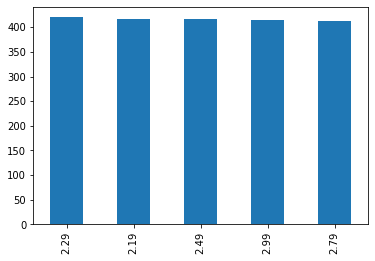

In [19]:
p1_table_0.plot.bar()

In [20]:
pd.crosstab(store_sales.p1_promo, store_sales.p1_price)

p1_price,2.19,2.29,2.49,2.79,2.99
p1_promo,,,,,
0,371,380,378,371,371
1,46,40,38,41,44


In [21]:
store_sales.groupby("p1_promo").p1_price.value_counts().unstack()

p1_price,2.19,2.29,2.49,2.79,2.99
p1_promo,,,,,
0,371,380,378,371,371
1,46,40,38,41,44


In [22]:
store_sales.groupby(["p1_promo", "country"]).p1_price.mean().unstack()

country,AUS,BRA,CHN,DEU,GBR,JPN,USA
p1_promo,,,,,,,
0,2.515843,2.554398,2.543093,2.553956,2.570212,2.544521,2.533463
1,2.550000,2.454706,2.647143,2.530000,2.586552,2.570000,2.538276


In [23]:
p1_table_1 = store_sales.groupby('p1_promo').p1_price.value_counts()
p1_table_1 = p1_table_1.unstack()
p1_table_1.div(p1_table_0) # Divides count prices by total count prices: gives relative frequency.

,2.19,2.29,2.49,2.79,2.99
p1_promo,,,,,
0,0.889688,0.904762,0.908654,0.900485,0.893976
1,0.110312,0.095238,0.091346,0.099515,0.106024


### 3.2.2 Continuous Variables

In [24]:
store_sales.p1_promo.mean()

0.10048076923076923

In [25]:
store_sales.p2_sales.median()

96.0

In [26]:
store_sales.p1_sales.var()

861.7204626392125

In [27]:
store_sales.p1_sales.std()

29.355075585649793

In [28]:
store_sales.p1_sales.mad() # Mean absolute deviation.

23.253990384615385

In [29]:
store_sales.p1_sales.quantile(q=[0.25, 0.5, 0.75])

0.25    113.0
0.50    130.0
0.75    151.0
Name: p1_sales, dtype: float64

In [30]:
store_sales.p1_sales.quantile(q=[0.05, 0.95])

0.05     93.0
0.95    187.0
Name: p1_sales, dtype: float64

In [31]:
store_sales.p1_sales.quantile(q=np.arange(0, 1.1, 0.1))

NameError: name 'np' is not defined

In [ ]:
def iqr(x):
  '''Return the interquartile range of the input numpy array'''
  return x.quantile(0.75) - x.quantile(0.25)
iqr(store_sales.p1_sales)

38.0

In [ ]:
pd.DataFrame([[store_sales.p1_sales.median(),
               store_sales.p2_sales.median()],
              [iqr(store_sales.p1_sales), iqr(store_sales.p2_sales)]],
             index=['Median sales', 'IQR'],
             columns=['p1_sales', 'p2_sales'])

,p1_sales,p2_sales
Median sales,130.0,96.0
IQR,38.0,33.0


## 3.3 Summarizing Data Frames

In [ ]:
store_sales.describe()

,year,week,p1_sales,p2_sales,p1_price,p2_price,p1_promo,p2_promo
count,2080.00000,2080.00000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000
mean,1.50000,26.50000,133.967788,99.911058,2.548654,2.716106,0.100481,0.145673
std,0.50012,15.01194,29.355076,24.453788,0.300716,0.333559,0.300712,0.352863
min,1.00000,1.00000,68.000000,51.000000,2.190000,2.290000,0.000000,0.000000
25%,1.00000,13.75000,113.000000,82.000000,2.290000,2.490000,0.000000,0.000000
50%,1.50000,26.50000,130.000000,96.000000,2.490000,2.590000,0.000000,0.000000
75%,2.00000,39.25000,151.000000,115.000000,2.790000,2.990000,0.000000,0.000000
max,2.00000,52.00000,265.000000,210.000000,2.990000,3.190000,1.000000,1.000000


In [ ]:
store_sales.p1_price.describe()

count    2080.000000
mean        2.548654
std         0.300716
min         2.190000
25%         2.290000
50%         2.490000
75%         2.790000
max         2.990000
Name: p1_price, dtype: float64

### 3.3.4 apply()

In [ ]:
store_sales.iloc[:, 3:9].mean()

p1_sales    133.967788
p2_sales     99.911058
p1_price      2.548654
p2_price      2.716106
p1_promo      0.100481
p2_promo      0.145673
dtype: float64

In [ ]:
store_sales.iloc[:, 3:9].mean(axis=1).head() # Axis 1, per row.

0    39.830000
1    40.780000
2    42.363333
3    37.663333
4    43.846667
dtype: float64

In [ ]:
try:
    store_sales.iloc[:, 3:9].iqr() # Will throw an error.
except AttributeError as e:
    print(e)

AttributeError: 'DataFrame' object has no attribute 'iqr'

In [ ]:
store_sales.iloc[:, 3:9].apply(iqr)

p1_sales    38.0
p2_sales    33.0
p1_price     0.5
p2_price     0.5
p1_promo     0.0
p2_promo     0.0
dtype: float64

In [ ]:
store_sales.iloc[:, 3:9].apply(iqr, axis=1).head()

0    81.750
1    59.425
2    60.200
3    76.500
4    84.775
dtype: float64

In [ ]:
store_sales.iloc[:, 3:9].apply(lambda x: x.mean() - x.median())

p1_sales    3.967788
p2_sales    3.911058
p1_price    0.058654
p2_price    0.126106
p1_promo    0.100481
p2_promo    0.145673
dtype: float64

In [ ]:
store_sales.p1_sales.apply(lambda x: 'high' if x > 130 else 'low')[:5]

0     low
1    high
2    high
3     low
4     low
Name: p1_sales, dtype: object

In [ ]:
pd.DataFrame([store_sales[['p1_sales', 'p2_sales']].median(),
              store_sales[['p1_sales', 'p2_sales']].apply(iqr)],
             index=['Median sales', 'IQR'])

,p1_sales,p2_sales
Median sales,130.0,96.0
IQR,38.0,33.0


<AxesSubplot:>

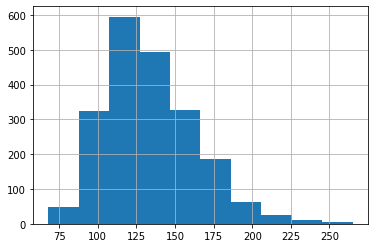

In [ ]:
store_sales.p1_sales.hist()

Text(0, 0.5, 'Count')

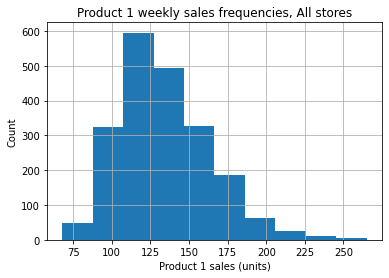

In [ ]:
import matplotlib.pyplot as plt
store_sales.p1_sales.hist()
plt.title('Product 1 weekly sales frequencies, All stores')
plt.xlabel('Product 1 sales (units)')
plt.ylabel('Count')

In [ ]:
plt.rcParams.update({'font.size': 12})

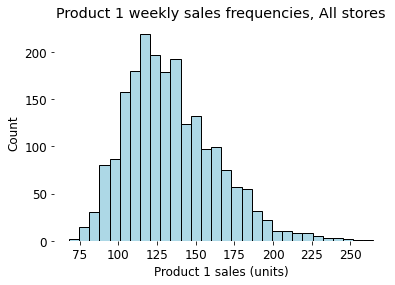

In [ ]:
store_sales.p1_sales.hist(bins=30,
                          edgecolor='k',
                          facecolor='lightblue')
plt.title('Product 1 weekly sales frequencies, All stores')
plt.xlabel('Product 1 sales (units)')
plt.ylabel('Count')
plt.grid(False)
plt.box(False)

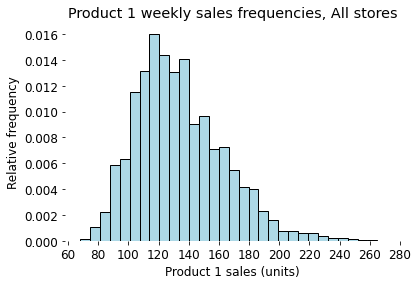

In [ ]:
store_sales.p1_sales.hist(bins=30,
                          edgecolor='k',
                          facecolor='lightblue',
                          density=True)
plt.title('Product 1 weekly sales frequencies, All stores')
plt.xlabel('Product 1 sales (units)')
plt.ylabel('Relative frequency')
plt.xticks(range(60, 300, 20))
plt.grid(False)
plt.box(False)

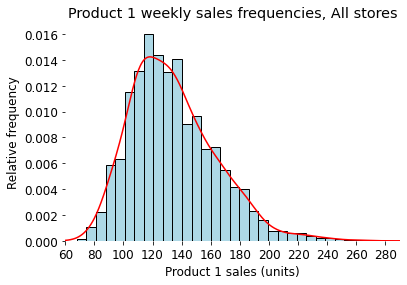

In [ ]:
store_sales.p1_sales.hist(bins=30,
                          edgecolor='k',
                          facecolor='lightblue',
                          density=True)
store_sales.p1_sales.plot.density(color='red')
plt.title('Product 1 weekly sales frequencies, All stores')
plt.xlabel('Product 1 sales (units)')
plt.ylabel('Relative frequency')
plt.xticks(range(60, 300, 20))
plt.xlim((60, 290))
plt.box(False)

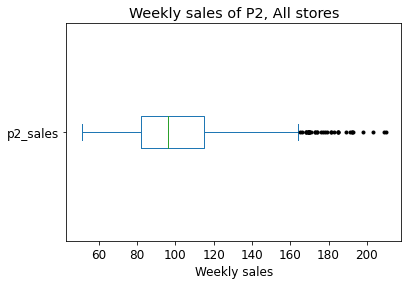

In [ ]:
p = store_sales.p2_sales.plot.box(vert=False, sym='k.')
plt.title('Weekly sales of P2, All stores')
plt.xlabel('Weekly sales')
p.set_facecolor('w')

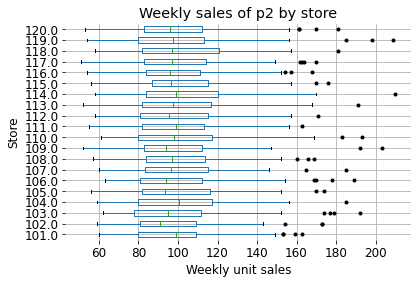

In [ ]:
store_sales.boxplot(column='p2_sales', by='store_num', vert=False,
                    sym='k.')
plt.suptitle('')
plt.title('Weekly sales of p2 by store')
plt.xlabel('Weekly unit sales')
plt.ylabel('Store')
plt.box(False)

In [ ]:
store_sales.boxplot(column='p2_sales', by='p2_promo', vert=False,
                    sym='k.')
plt.suptitle('')
plt.title('Weekly sales of p2 with and without promotion')
plt.xlabel('Weekly unit sales')
plt.ylabel('P2 promo in store?')
plt.yticks([1, 2], ['No', 'Yes'])
plt.box(False)

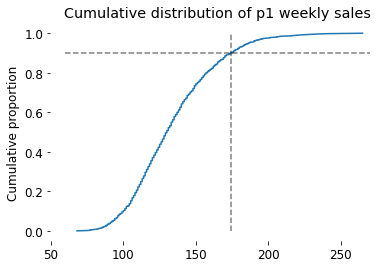

In [ ]:
# Cumulative distribution.
from statsmodels.distributions.empirical_distribution import ECDF
e = ECDF(store_sales.p1_sales)
plt.plot(e.x, e.y)
plt.title('Cumulative distribution of p1 weekly sales')
plt.ylabel('Cumulative proportion')
plt.plot([60, 270], [0.9, 0.9], 'k--', alpha=0.5)
plt.plot([store_sales.p1_sales.quantile(.9),
          store_sales.p1_sales.quantile(.9)],
         [0, 1], 'k--', alpha=0.5)
plt.box(False)

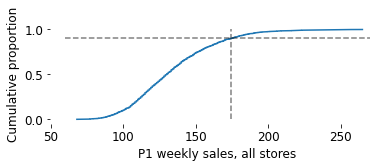

In [ ]:
ecdf_x = store_sales.p1_sales.sort_values()
ecdf_y = np.arange(0, 1, 1/len(store_sales.p1_sales))
plt.subplot(2,1,2)
plt.plot(ecdf_x, ecdf_y)
plt.xlabel('P1 weekly sales, all stores')
plt.ylabel('Cumulative proportion')
plt.plot([60, 270], [0.9, 0.9], 'k--', alpha=0.5)
plt.plot([store_sales.p1_sales.quantile(.9),
          store_sales.p1_sales.quantile(.9)],
         [0, 1], 'k--', alpha=0.5)
plt.box(False)